<a href="https://colab.research.google.com/github/alharuty/PracticandoDS/blob/main/DS_week2_Alla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2: Clean your data**

In this week's assignment we will perform the complete data preprocessing on a dataset from a clinical research laboratory.

## Description

Obesity is a risk factor for breast cancer in premenopausal women. Existing literature has found that obesity is a risk factor because it can increase estrogen levels in women. Specifically, a biomarker of estrogen level, serum estradiol, is an identified risk factor for breast cancer. To evaluate this type of relationship, researchers studied a group of 211 women of premenonausal age in the USA, 151 of whom were black (African American) and 60 white (Caucasian). Adiposity was quantified with two different measures: BMI and WHR. Estradiol level was also measured from hormone analysis. Other risk factors such as number of children and age of the woman are also included. The dataset includes the following descriptors:

* **Id:** identifier.
* **Estrad (serum estradiol):** measure of estradiol (hormone analysis)
* **Ethnic (ethnicity):** African American or Caucasian.
* **Entage:** age of the person.
* **NumChild:** number of children.
* **Agefbo:** age at which the person has had the first child.
* **Anykids:** 1 if he/she has had children, 0 if he/she has not.
* **Agemenar:** age of menarche (first menstruation).
* **BMI:** measure of general adiposity.
* **WHR:** measure of abdominal adiposity.
* **Area:** rural (1) or urban (0).

## File upload

We start by loading the dataset we will be working with. Remember that in order to start working with Google Colab you must **Connect to a runtime environment**.

Then you must go to the **Files** folder (in the left panel), where you must upload the csv attached to this assignment.

In [50]:
import pandas as pd

dataset = pd.read_csv('estradiol.csv', sep=';')

**Exercise:** Make a brief preliminar inspection of the dataset, indicating the number of records, the number of descriptors, and the name of the descriptors. If you identify a descriptor that should not appear in the dataset, remove it.

In [51]:
# Your answer here
print(dataset.shape)
print(dataset.head(1))
print(dataset.dtypes)


(211, 11)
   Id Estradl     Ethnic Entage  Numchild  Agefbo  Anykids Agemenar      BMI  \
1   2      94  Caucasian     30         0       0        0     11,0  18,9038   

   WHR  Area  
1  0,7     0  
Id           int64
Estradl     object
Ethnic      object
Entage      object
Numchild     int64
Agefbo       int64
Anykids      int64
Agemenar    object
BMI         object
WHR         object
Area         int64
dtype: object


**Exercise:** Show a random selection of some records from the dataset. This will help you to perform a preliminary visual inspection to confirm that the data has been loaded correctly. If you identify any formatting problems that need to be corrected, please do so.

In [52]:
# Your answer here

dataset.head(5)
# cambiamos de str a int
dataset['Agemenar'] = dataset['Agemenar'].astype(str).str.replace(',', '.')
dataset['Estradl'] = dataset['Estradl'].astype(str).str.replace(',', '.')
dataset['Agemenar'] = dataset['Agemenar'].astype(float)
dataset['Estradl'] = dataset['Estradl'].astype(float)
dataset['Agemenar'] = dataset['Agemenar'].astype(int)
dataset['Estradl'] = dataset['Estradl'].astype(int)

dataset.head(5)

,Id,Estradl,Ethnic,Entage,Numchild,Agefbo,Anykids,Agemenar,BMI,WHR,Area
1,2,94,Caucasian,30,0,0,0,11,"18,9038","0,7",0
2,2,7,Caucasian,23,0,0,0,15,"20,4386","0,7",0
3,3,20,Caucsian,21,0,0,0,13,"22,2578","0,75",1
4,6,41,Caucasian,33,0,0,0,14,"20,5265","0,73",1
5,8,42,Caucsian,31,0,0,0,13,"24,3356","0,75",1


**Exercise:** Determine the mean, median and standard deviation for the descriptors of a quantitative nature.

In [53]:
# Your answer here

mean = round((dataset['Estradl'].mean()), 2)
median = round((dataset['Estradl'].median()), 2)
standart_deviation = round((dataset['Estradl'].std()), 2)

print(f'Mean = {mean} \nMedian = {median} \nstandart_deviation = {standart_deviation}')

Mean = 38.97 
Median = 36.0 
standart_deviation = 29.28


## Outliers

Analyze the presence of possible extreme values (outliers) in the Estradiol variable. If very extreme values are observed, delete the corresponding records from the file. Display a boxplot to visualize the possible presence of outliers. At the end of the deletion (if applicable), display a boxplot with the final values.

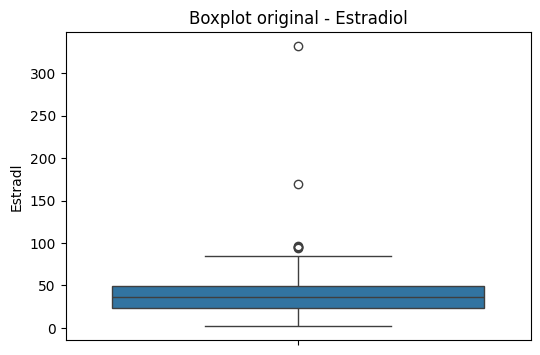

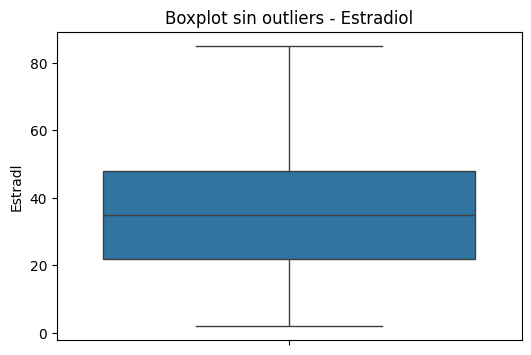

In [54]:
# Your answer here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar boxplot original
plt.figure(figsize=(6, 4))
sns.boxplot(y=dataset['Estradl'])
plt.title('Boxplot original - Estradiol')
plt.show()

# Detectar outliers usando el método IQR
Q1 = dataset['Estradl'].quantile(0.25)
Q3 = dataset['Estradl'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar datos eliminando outliers
df_sin_outliers = dataset[(dataset['Estradl'] >= limite_inferior) & (dataset['Estradl'] <= limite_superior)]

# 5. Mostrar boxplot sin outliers
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_sin_outliers['Estradl'])
plt.title('Boxplot sin outliers - Estradiol')
plt.show()

# (Opcional) Guardar los datos sin outliers en un nuevo archivo
#df_sin_outliers.to_csv('datos_sin_outliers.csv', index=False)

#Para detectar valores atípicos (outliers) en una variable como Estradiol, se utiliza el método del rango intercuartílico (IQR), que identifica valores extremos comparando cada dato con los cuartiles del conjunto.
# Por ejemplo, si tenemos los valores de Estradiol: [100, 105, 110, 115, 120, 500], podemos calcular los cuartiles como Q1 = 105 y Q3 = 120. El rango intercuartílico (IQR) sería 120 - 105 = 15. Para identificar los outliers, se calculan los límites inferior y superior:
#Límite inferior = Q1 - 1.5 × IQR = 105 - (1.5 × 15) = 82.5
#Límite superior = Q3 + 1.5 × IQR = 120 + (1.5 × 15) = 142.5
#Cualquier valor fuera de este rango se considera un valor atípico. En este caso, el valor 500 está por encima de 142.5, por lo tanto se clasifica como un outlier.



## Quantitative values

Check using boxplots or histograms the values of the rest of the quantitative variables and identify if there are any cases with anomalous values. You only have to identify them, we will correct them later.

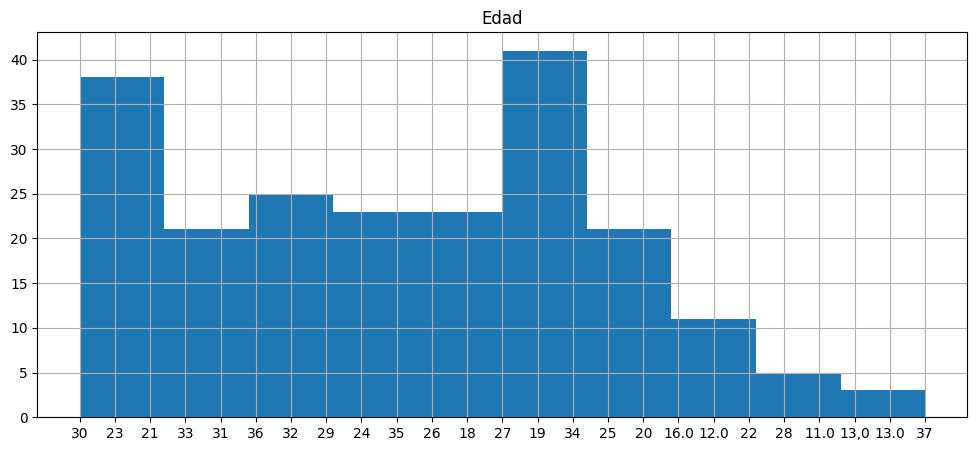

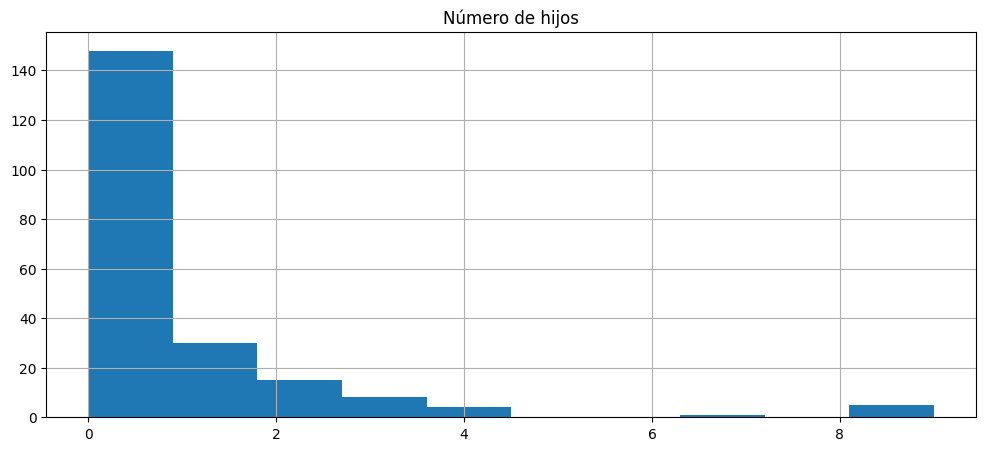

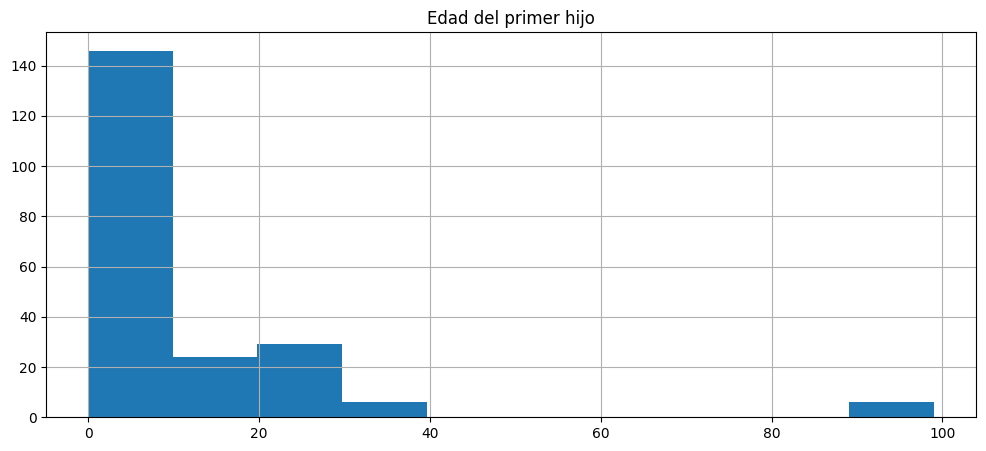

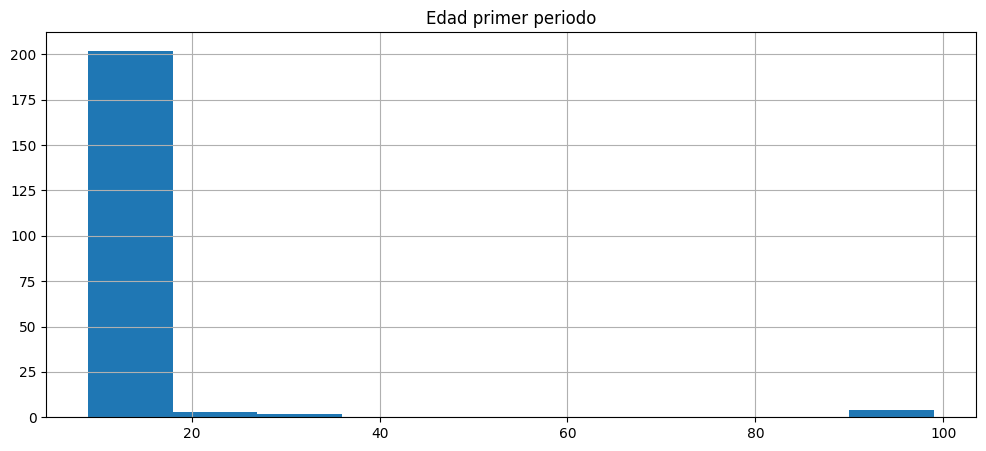

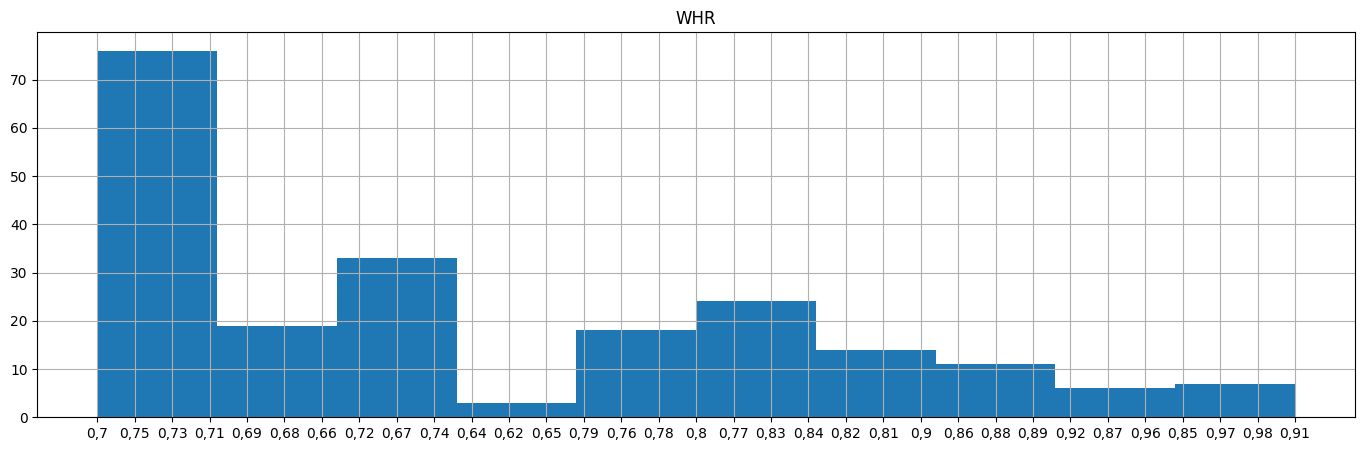

In [55]:
# Your answer here
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
dataset.sort_values('Entage', ascending=True, inplace=False)
plt.title("Edad")
dataset['Entage'].hist()
plt.show()


plt.figure(figsize=(12, 5))
dataset.sort_values('Numchild', ascending=True, inplace=False)
plt.title("Número de hijos")
dataset['Numchild'].hist()
plt.show()


plt.figure(figsize=(12, 5))
dataset.sort_values('Agefbo', ascending=True, inplace=False)
plt.title("Edad del primer hijo")
dataset['Agefbo'].hist()
plt.show()


plt.figure(figsize=(12, 5))
dataset.sort_values('Agemenar', ascending=True, inplace=False)
plt.title("Edad primer periodo")
dataset['Agemenar'].hist()
plt.show()



plt.figure(figsize=(17, 5))
dataset.sort_values('WHR', ascending=True, inplace=False)
plt.title("WHR")
dataset['WHR'].hist()
plt.show()



## Inconsistencies

Identify and correct all possible inconsistencies mentioned below:

* Inconsistencies between Anykids and Numchild. The Numchild value prevails. And therefore, Anykids must be adjusted accordingly.

* Inconsistencies between Entage and Agemenarq. If Agemenarq is higher than EntAge, it is probably due to a data entry error and therefore the values must be exchanged.

* Agefbo should be greater than Agemenarq if the woman has had any children. It takes the value 0 otherwise.

In [ ]:
# Your answer here

## Qualitative values

Modify the values of the qualitative variables so that they satisfy the following conditions. Do not forget to identify possible errors.

* The values of the Ethnic variable are standardized to "African American" and "Caucasian".

* The values of the variable Anykids should be "Yes" (value 1), and "No" (value 0).

* The values of the variable Area are "Rural" (value 1) or "Urban" (value 0).

In [59]:
# Your answer here
print(dataset['Ethnic'].unique())

dataset['cleand_eth'] = dataset['Ethnic'].replace({
    "  Caucsian": "Caucasian",
    "Caucacian": "Caucasian",
    "   African American   ": "African American",
    "African american": "African American",
    "Af Am": "African American"
})

print(dataset['Area'].unique())
dataset['name_Area'] = dataset["Area"].replace({
    1: "Rural",
    0: "Urban"
})

dataset.head(5)

['Caucasian' '  Caucsian' 'Caucacian' 'Caucsian' 'African American'
 '   African American   ' 'African american' 'Af Am']
[0 1]


,Id,Estradl,Ethnic,Entage,Numchild,Agefbo,Anykids,Agemenar,BMI,WHR,Area,cleand_eth,name_Area
1,2,94,Caucasian,30,0,0,0,11,"18,9038","0,7",0,Caucasian,Urban
2,2,7,Caucasian,23,0,0,0,15,"20,4386","0,7",0,Caucasian,Urban
3,3,20,Caucsian,21,0,0,0,13,"22,2578","0,75",1,Caucasian,Rural
4,6,41,Caucasian,33,0,0,0,14,"20,5265","0,73",1,Caucasian,Rural
5,8,42,Caucsian,31,0,0,0,13,"24,3356","0,75",1,Caucasian,Rural


## Imputation

In the case of detecting any outliers in the quantitative variables age, age at menarche or number of children (not previously resolved) perform a value imputation on these variables.

In case of performing value imputations, the imputation should be done using only the information of the quantitative variables and the data of the same ethnicity.

In [67]:
# Your answer here
dataset.head(5)

count_uniques = dataset['Entage'].unique()
print(f"Uniqs: {count_uniques}")

count_nulls = dataset['Entage'].isnull().sum()
print(f"Nulls: {count_nulls}")

Uniqs: ['30' '23' '21' '33' '31' '36' '32' '29' '24' '35' '26' '18' '27' '19'
 '34' '25' '20' '16.0' '12.0' '22' '28' '11.0' '13,0' '13.0' '37']
Nulls: 0


## Save file

Save the preprocessed dataset in a new file named **estradiol_clean.csv**.

In [79]:
# Your answer here

dataset.head(5)

new_dataset = dataset[['Id', "Estradl", "Entage", "Numchild", "Agefbo", "Agemenar", "BMI", "WHR", "cleand_eth", "name_Area"]]
new_dataset = new_dataset.rename(columns={"cleand_eth": "Ethnicity", "name_Area": "Area"})

new_dataset.head(5)

new_dataset.to_csv('estradiol_clean.csv', index=False)